In [2]:
import boto3
import pandas as pd
from io import BytesIO

s3 = boto3.client('s3')
bucket_name = 'mybucketgroup7'

final_merged_key = 'final_merged.csv'

# Function to load a CSV file from S3
def load_csv_from_s3(bucket, key):
    response = s3.get_object(Bucket=bucket, Key=key)
    content = response['Body']
    return pd.read_csv(BytesIO(content.read()))

# Load your dataframes
final_merged = load_csv_from_s3(bucket_name, final_merged_key)


In [3]:
final_merged.head()

,id,prompt_id,text,generated
0,0059830c,0.0,Cars. Cars have been around since they became ...,0
1,005db917,0.0,Transportation is a large necessity in most co...,0
2,008f63e3,0.0,"""America's love affair with it's vehicles seem...",0
3,00940276,0.0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0.0,Cars are a wonderful thing. They are perhaps o...,0


In [4]:
import pandas as pd
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import mplcursors
import matplotlib.image as mpimg
import wordtree
import os
import matplotlib
import re
import spacy
from textblob import TextBlob, Word
from tqdm import tqdm

nltk.download(['punkt','stopwords','wordnet','omw-1.4','averaged_perceptron_tagger'])

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/ec2-user/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [5]:
df=final_merged

In [6]:
df.head()

,id,prompt_id,text,generated
0,0059830c,0.0,Cars. Cars have been around since they became ...,0
1,005db917,0.0,Transportation is a large necessity in most co...,0
2,008f63e3,0.0,"""America's love affair with it's vehicles seem...",0
3,00940276,0.0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0.0,Cars are a wonderful thing. They are perhaps o...,0


In [7]:
df = df.drop_duplicates(subset='text', keep='first')
df

,id,prompt_id,text,generated
0,0059830c,0.0,Cars. Cars have been around since they became ...,0
1,005db917,0.0,Transportation is a large necessity in most co...,0
2,008f63e3,0.0,"""America's love affair with it's vehicles seem...",0
3,00940276,0.0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0.0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
29140,NaN,NaN,Today's society is ever-evolving and the role ...,1
29141,NaN,NaN,The ever-evolving world of technology has chan...,1
29142,NaN,NaN,Fostering a Rescue Dog: Gaining Unconditional ...,1
29143,NaN,NaN,The importance of a solid foundation in educat...,1


In [8]:
df['generated'].value_counts()

0    16122
1    11218
Name: generated, dtype: int64

## Data Preprocessing

In [9]:
essays = df['text'].tolist()
tokenized_data = [word_tokenize(essay) for essay in tqdm(essays)]

print(tokenized_data[0])


100%|██████████| 27340/27340 [01:30<00:00, 302.85it/s]

['Cars', '.', 'Cars', 'have', 'been', 'around', 'since', 'they', 'became', 'famous', 'in', 'the', '1900s', ',', 'when', 'Henry', 'Ford', 'created', 'and', 'built', 'the', 'first', 'ModelT', '.', 'Cars', 'have', 'played', 'a', 'major', 'role', 'in', 'our', 'every', 'day', 'lives', 'since', 'then', '.', 'But', 'now', ',', 'people', 'are', 'starting', 'to', 'question', 'if', 'limiting', 'car', 'usage', 'would', 'be', 'a', 'good', 'thing', '.', 'To', 'me', ',', 'limiting', 'the', 'use', 'of', 'cars', 'might', 'be', 'a', 'good', 'thing', 'to', 'do', '.', 'In', 'like', 'matter', 'of', 'this', ',', 'article', ',', '``', 'In', 'German', 'Suburb', ',', 'Life', 'Goes', 'On', 'Without', 'Cars', ',', "''", 'by', 'Elizabeth', 'Rosenthal', 'states', ',', 'how', 'automobiles', 'are', 'the', 'linchpin', 'of', 'suburbs', ',', 'where', 'middle', 'class', 'families', 'from', 'either', 'Shanghai', 'or', 'Chicago', 'tend', 'to', 'make', 'their', 'homes', '.', 'Experts', 'say', 'how', 'this', 'is', 'a', 'hu

## Make lowercase and remove punctuation:
## We remove irrelevant characters like punctuations. To do so, we check if the word is alphanumeric or not thus using only words and omitting punctuations.
## To remove redundancy we make the words lowercase so words like "DeviCEs" and "devices" are considered to be same and redundancy is removed.

In [10]:
data_processed= [[word.lower() for word in essay if word.isalpha()] for essay in tokenized_data]
print(data_processed[0])

['cars', 'cars', 'have', 'been', 'around', 'since', 'they', 'became', 'famous', 'in', 'the', 'when', 'henry', 'ford', 'created', 'and', 'built', 'the', 'first', 'modelt', 'cars', 'have', 'played', 'a', 'major', 'role', 'in', 'our', 'every', 'day', 'lives', 'since', 'then', 'but', 'now', 'people', 'are', 'starting', 'to', 'question', 'if', 'limiting', 'car', 'usage', 'would', 'be', 'a', 'good', 'thing', 'to', 'me', 'limiting', 'the', 'use', 'of', 'cars', 'might', 'be', 'a', 'good', 'thing', 'to', 'do', 'in', 'like', 'matter', 'of', 'this', 'article', 'in', 'german', 'suburb', 'life', 'goes', 'on', 'without', 'cars', 'by', 'elizabeth', 'rosenthal', 'states', 'how', 'automobiles', 'are', 'the', 'linchpin', 'of', 'suburbs', 'where', 'middle', 'class', 'families', 'from', 'either', 'shanghai', 'or', 'chicago', 'tend', 'to', 'make', 'their', 'homes', 'experts', 'say', 'how', 'this', 'is', 'a', 'huge', 'impediment', 'to', 'current', 'efforts', 'to', 'reduce', 'greenhouse', 'gas', 'emissions',

In [11]:
flattened = [val for essay in data_processed for val in essay]
count = Counter(flattened)
count.most_common(10)

[('the', 478221),
 ('to', 341458),
 ('and', 262567),
 ('a', 237747),
 ('of', 229121),
 ('in', 182381),
 ('is', 164822),
 ('that', 162721),
 ('it', 137157),
 ('for', 115089)]

## As we can see above, the most common words are those which provide very little value to the data. So lets remove these stopwords and find the most common words relevant to the data

In [12]:
stop_words = stopwords.words('english')
data_processed = [[word for word in essay if word not in stop_words] for essay in data_processed]
data_processed_main = data_processed
print(data_processed_main[0])

['cars', 'cars', 'around', 'since', 'became', 'famous', 'henry', 'ford', 'created', 'built', 'first', 'modelt', 'cars', 'played', 'major', 'role', 'every', 'day', 'lives', 'since', 'people', 'starting', 'question', 'limiting', 'car', 'usage', 'would', 'good', 'thing', 'limiting', 'use', 'cars', 'might', 'good', 'thing', 'like', 'matter', 'article', 'german', 'suburb', 'life', 'goes', 'without', 'cars', 'elizabeth', 'rosenthal', 'states', 'automobiles', 'linchpin', 'suburbs', 'middle', 'class', 'families', 'either', 'shanghai', 'chicago', 'tend', 'make', 'homes', 'experts', 'say', 'huge', 'impediment', 'current', 'efforts', 'reduce', 'greenhouse', 'gas', 'emissions', 'tailpipe', 'passenger', 'cars', 'responsible', 'percent', 'greenhouse', 'gas', 'emissions', 'europe', 'percent', 'carintensive', 'areas', 'united', 'states', 'cars', 'main', 'reason', 'greenhouse', 'gas', 'emissions', 'lot', 'people', 'driving', 'around', 'time', 'getting', 'need', 'go', 'article', 'paris', 'bans', 'drivin

In [13]:
flattened = [val for essay in data_processed_main for val in essay]
count = Counter(flattened)
count.most_common(10)

[('people', 76077),
 ('would', 40067),
 ('one', 36173),
 ('electoral', 35187),
 ('also', 32572),
 ('college', 31699),
 ('like', 29341),
 ('could', 28942),
 ('help', 28345),
 ('car', 27853)]

## Lemmatization

In [14]:
from tqdm import tqdm
lemmatizer = WordNetLemmatizer()

def lemmatize_words(words, pos_tags):
    return [lemmatizer.lemmatize(word, pos=wordnet_pos(tag)) for word, tag in zip(words, pos_tags)]

def wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

    
#sentPos = [nltk.pos_tag(sent) for sent in tqdm(data_processed_main)]
#dataLemma = [[lemmatizer.lemmatize(word, pos=wordnet_pos(tag)) for word, tag in pos_tags] for pos_tags in tqdm(sentPos)]
dataLemma = [[lemmatizer.lemmatize(word) for word in sent] for sent in tqdm(data_processed_main)]

print(dataLemma[0])

100%|██████████| 27340/27340 [00:26<00:00, 1013.66it/s]

['car', 'car', 'around', 'since', 'became', 'famous', 'henry', 'ford', 'created', 'built', 'first', 'modelt', 'car', 'played', 'major', 'role', 'every', 'day', 'life', 'since', 'people', 'starting', 'question', 'limiting', 'car', 'usage', 'would', 'good', 'thing', 'limiting', 'use', 'car', 'might', 'good', 'thing', 'like', 'matter', 'article', 'german', 'suburb', 'life', 'go', 'without', 'car', 'elizabeth', 'rosenthal', 'state', 'automobile', 'linchpin', 'suburb', 'middle', 'class', 'family', 'either', 'shanghai', 'chicago', 'tend', 'make', 'home', 'expert', 'say', 'huge', 'impediment', 'current', 'effort', 'reduce', 'greenhouse', 'gas', 'emission', 'tailpipe', 'passenger', 'car', 'responsible', 'percent', 'greenhouse', 'gas', 'emission', 'europe', 'percent', 'carintensive', 'area', 'united', 'state', 'car', 'main', 'reason', 'greenhouse', 'gas', 'emission', 'lot', 'people', 'driving', 'around', 'time', 'getting', 'need', 'go', 'article', 'paris', 'ban', 'driving', 'due', 'smog', 'robe

In [15]:
import json
file_path = 'lemmatized.json'

with open(file_path, 'w') as json_file:
    json.dump(dataLemma, json_file)

In [16]:
import json

file_path = 'lemmatized.json'

# Read the list from the JSON file
with open(file_path, 'r') as json_file:
    dataLemma = json.load(json_file)
print(dataLemma[0])

['car', 'car', 'around', 'since', 'became', 'famous', 'henry', 'ford', 'created', 'built', 'first', 'modelt', 'car', 'played', 'major', 'role', 'every', 'day', 'life', 'since', 'people', 'starting', 'question', 'limiting', 'car', 'usage', 'would', 'good', 'thing', 'limiting', 'use', 'car', 'might', 'good', 'thing', 'like', 'matter', 'article', 'german', 'suburb', 'life', 'go', 'without', 'car', 'elizabeth', 'rosenthal', 'state', 'automobile', 'linchpin', 'suburb', 'middle', 'class', 'family', 'either', 'shanghai', 'chicago', 'tend', 'make', 'home', 'expert', 'say', 'huge', 'impediment', 'current', 'effort', 'reduce', 'greenhouse', 'gas', 'emission', 'tailpipe', 'passenger', 'car', 'responsible', 'percent', 'greenhouse', 'gas', 'emission', 'europe', 'percent', 'carintensive', 'area', 'united', 'state', 'car', 'main', 'reason', 'greenhouse', 'gas', 'emission', 'lot', 'people', 'driving', 'around', 'time', 'getting', 'need', 'go', 'article', 'paris', 'ban', 'driving', 'due', 'smog', 'robe

## Word Cloud

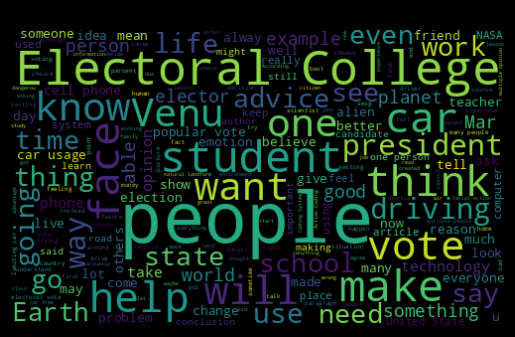

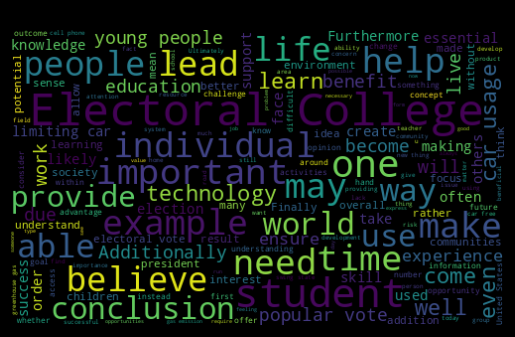

In [17]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
# Filter data for human-generated and AI-generated text
human_data = df[df['generated'] == 0]['text'].values.tolist()
ai_data = df[df['generated'] == 1]['text'].values.tolist()

human_data = ' '.join(human_data)
ai_data = ' '.join(ai_data)
# Function to generate word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(
        width=500,
        height=300,
        background_color='black',
        stopwords=STOPWORDS
    ).generate(text)

    fig, ax = plt.subplots(facecolor='k', edgecolor='k')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate word clouds for human-generated and AI-generated text
generate_word_cloud(human_data, 'Human Generated Word Cloud')
generate_word_cloud(ai_data, 'AI Generated Word Cloud')

## Tf-IDF

In [18]:
import numpy as np
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
lemmatized_text = [' '.join(words) for words in dataLemma]


vectorizer = TfidfVectorizer(max_df = 0.6)
tfidf_vector = vectorizer.fit_transform(lemmatized_text)


#tfidf_vector = tfidf_matrix.toarray()
tfidf_filename = 'tfidf_matrix_Train_Essay_Data.joblib'
joblib.dump(tfidf_vector, tfidf_filename)

tfidf_vector

<27340x64109 sparse matrix of type '<class 'numpy.float64'>'
	with 3141470 stored elements in Compressed Sparse Row format>

## Data Spliting

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression

In [20]:
y = df['generated']
X_train, X_test, y_train, y_test = train_test_split(tfidf_vector, y , test_size=0.2, shuffle = True)
print('Shape of training data is: ',X_train.shape)
print('Shape of training labels is: ',y_train.shape)
print('Shape of testing data is: ',X_test.shape)
print('Shape of testing labels is: ',y_test.shape)

Shape of training data is:  (21872, 64109)
Shape of training labels is:  (21872,)
Shape of testing data is:  (5468, 64109)
Shape of testing labels is:  (5468,)


In [21]:
y_test.value_counts()

0    3202
1    2266
Name: generated, dtype: int64

## Base Line Model - Logistic Regression

In [22]:
from sklearn.metrics import confusion_matrix

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    LRaccuracy = accuracy_score(y_test, y_pred)
    LRprecision = precision_score(y_test, y_pred)
    LRrecall = recall_score(y_test, y_pred)
    LRf1 = f1_score(y_test, y_pred)
    print('Precision is: ',LRprecision)
    print('Accuracy is: ',LRaccuracy)
    print('Recall is: ',LRrecall)
    print('F1 is: ',LRf1)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Precision is:  0.9910354101299865
Accuracy is:  0.9862838332114119
Recall is:  0.9757281553398058
F1 is:  0.9833222148098733


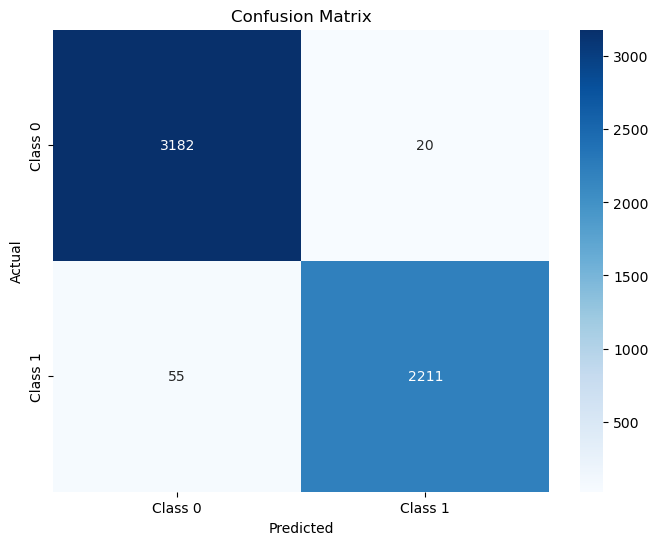

In [23]:
import pickle
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

with open('logreg_Train_Esssay_Data.pkl', 'wb') as model_file:
    pickle.dump(logreg, model_file)

evaluate(logreg, X_test, y_test)

## Random Forest Classifier

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:   34.8s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


Precision is:  0.9950316169828365
Accuracy is:  0.9864667154352597
Recall is:  0.972197705207414
F1 is:  0.9834821428571427


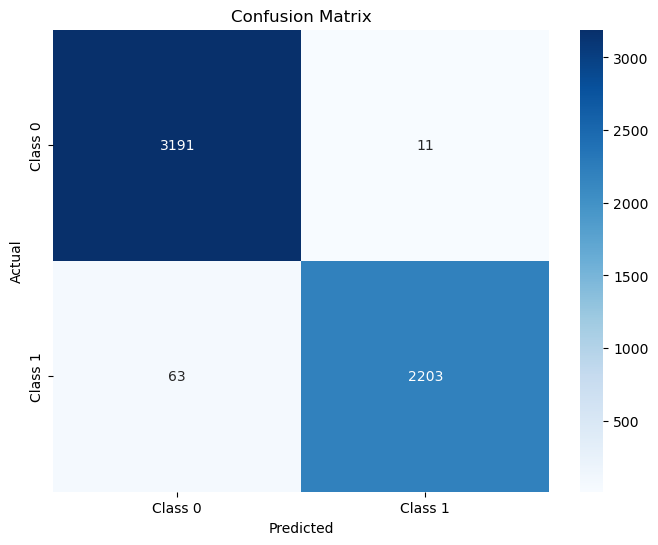

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(verbose=1)
randomForest.fit(X_train, y_train)

with open('ranFor_Train_Esssay_Data.pkl', 'wb') as model_file:
    pickle.dump(randomForest, model_file)
evaluate(randomForest, X_test, y_test)

## Decision Tree Classifier

Precision is:  0.9073748902546093
Accuracy is:  0.9250182882223847
Recall is:  0.912180052956752
F1 is:  0.9097711267605634


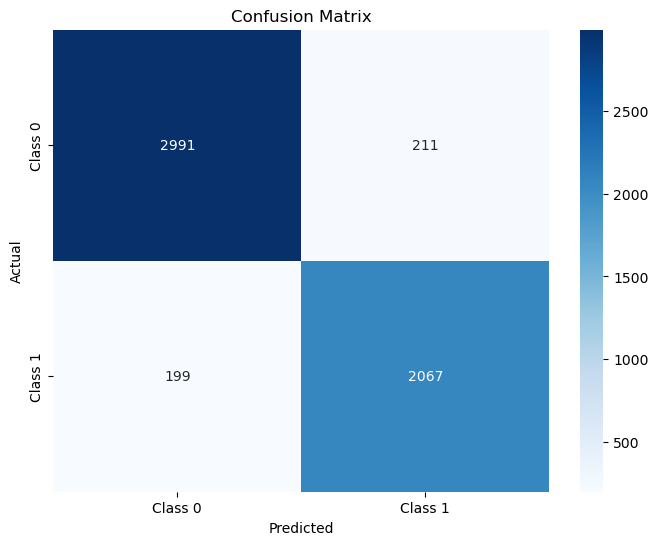

In [25]:
decTree = DecisionTreeClassifier()
decTree.fit(X_train, y_train)

with open('decTree_Train_Esssay_Data.pkl', 'wb') as model_file:
    pickle.dump(decTree, model_file)
evaluate(decTree, X_test, y_test)

## Gradient Boosting Classifier

Precision is:  0.9801533603969328
Accuracy is:  0.9749451353328457
Recall is:  0.9589585172109444
F1 is:  0.9694401070711577


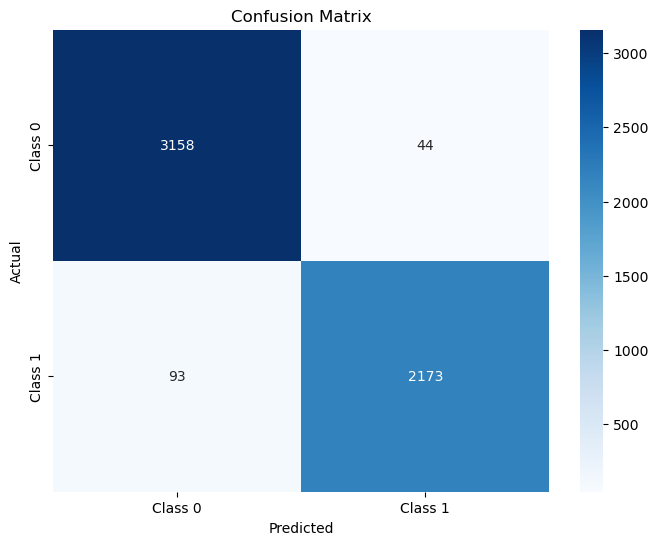

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

with open('gb_Train_Esssay_Data.pkl', 'wb') as model_file:
    pickle.dump(gb, model_file)
evaluate(gb, X_test, y_test)

In [27]:
def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)
    LRaccuracy = accuracy_score(y_test, y_pred)
    LRprecision = precision_score(y_test, y_pred)
    LRrecall = recall_score(y_test, y_pred)
    LRf1 = f1_score(y_test, y_pred)
    print('Precision is: ',LRprecision)
    print('Accuracy is: ',LRaccuracy)
    print('Recall is: ',LRrecall)
    print('F1 is: ',LRf1)

evaluate(logreg, X_test, y_test)
print()
evaluate(randomForest, X_test, y_test)
print()
evaluate(decTree, X_test, y_test)
print()
evaluate(gb, X_test, y_test)
print()

Precision is:  0.9910354101299865
Accuracy is:  0.9862838332114119
Recall is:  0.9757281553398058
F1 is:  0.9833222148098733



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s


Precision is:  0.9950316169828365
Accuracy is:  0.9864667154352597
Recall is:  0.972197705207414
F1 is:  0.9834821428571427

Precision is:  0.9073748902546093
Accuracy is:  0.9250182882223847
Recall is:  0.912180052956752
F1 is:  0.9097711267605634

Precision is:  0.9801533603969328
Accuracy is:  0.9749451353328457
Recall is:  0.9589585172109444
F1 is:  0.9694401070711577



## Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the logistic regression model
logreg = LogisticRegression()

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'lbfgs']
}

# Create a grid search with cross-validation
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Save the best model to a file
with open('best_logreg_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

# Evaluate the best model
evaluate(best_model, X_test, y_test)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)


/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.